🔹 Dataset Shape: (100, 15)
🔹 First 5 Records:
  Employee_ID   Department        Job_Title  Age Gender Education_Level  \
0       E0001  Engineering  DevOps Engineer   25      M        Master's   
1       E0002      Finance       Accountant   56  Other     High School   
2       E0003        Sales  Sales Executive   57      M      Bachelor's   
3       E0004  Engineering  DevOps Engineer   47      M        Master's   
4       E0005           HR        Recruiter   23      M      Bachelor's   

   Years_at_Company  Monthly_Hours_Worked  Projects_Completed  Training_Hours  \
0                 7                   159                  11              16   
1                14                   195                   3              47   
2                 4                   145                   5              66   
3                20                   193                  14              62   
4                 0                   149                   1              40   

   Absenteeism_D

<ipython-input-9-87f93ea65dd0>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=performance_col, palette='Blues')


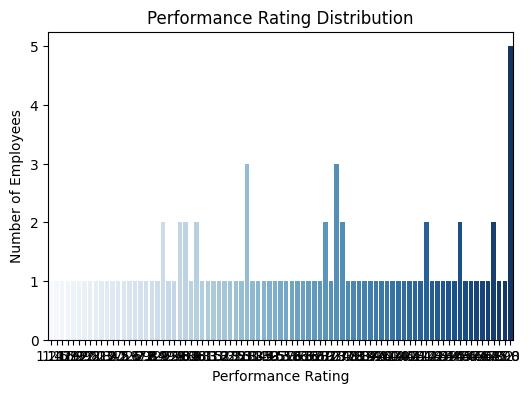

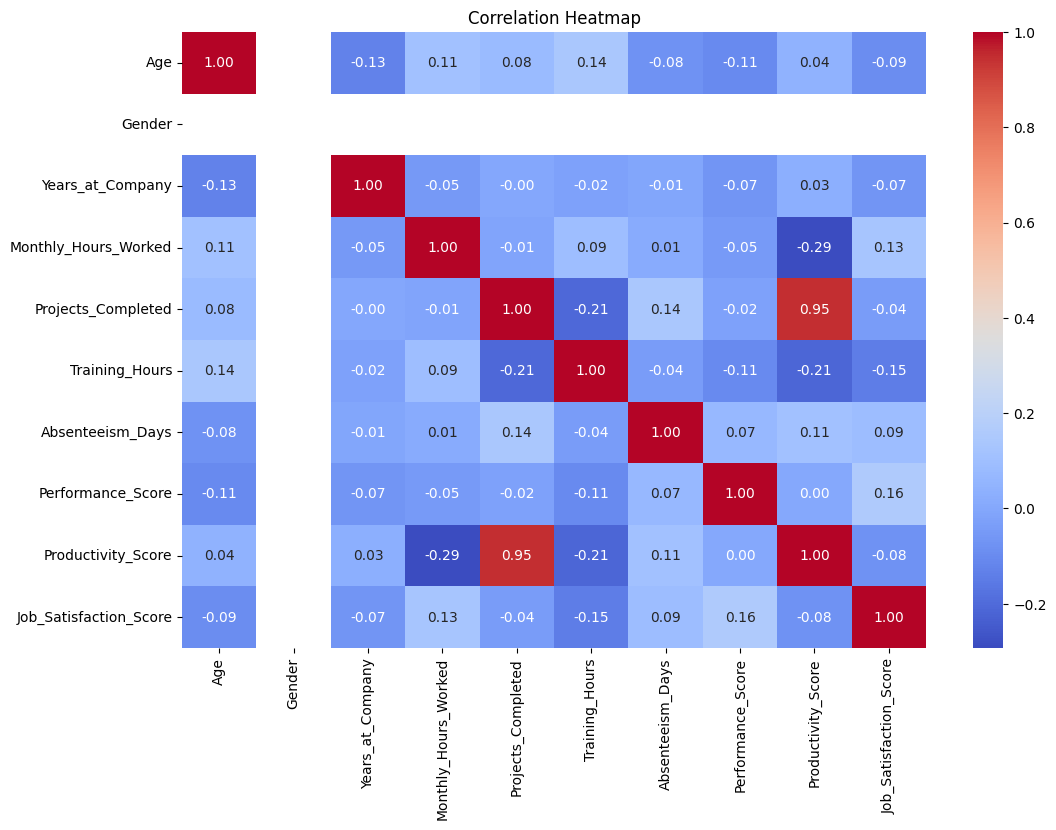

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Employee_Performance_Analytics.csv'
df = pd.read_csv(file_path)

# Show basic info
print("🔹 Dataset Shape:", df.shape)
print("🔹 First 5 Records:")
print(df.head())

# Check column names
print("\n🔍 Column Names in Dataset:")
print(df.columns.tolist())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Try to find the performance column
possible_performance_columns = ['PerformanceRating', 'Performance_Score', 'Rating', 'Appraisal', 'EmployeePerformance']
performance_col = next((col for col in possible_performance_columns if col in df.columns), None)

if performance_col is None:
    raise ValueError("❌ Could not find a valid performance column in your dataset.")

print(f"\n✅ Using performance column: {performance_col}")

# -------------------------------------------
# 🔍 Exploratory Data Analysis (EDA)
# -------------------------------------------

# Plot 1: Performance Rating distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=performance_col, palette='Blues')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

# Plot 2: Monthly Income by Performance Rating
if 'MonthlyIncome' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=performance_col, y='MonthlyIncome', palette='Set2')
    plt.title('Monthly Income by Performance Rating')
    plt.show()

# Plot 3: OverTime vs Performance (if exists)
if 'OverTime' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='OverTime', hue=performance_col, palette='coolwarm')
    plt.title('OverTime vs Performance Rating')
    plt.show()

# Plot 4: YearsAtCompany by Performance (if exists)
if 'YearsAtCompany' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=performance_col, y='YearsAtCompany', palette='Accent')
    plt.title('Years at Company by Performance Rating')
    plt.show()

# Plot 5: Department-wise Monthly Income by Performance (if both exist)
if 'Department' in df.columns and 'MonthlyIncome' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Department', y='MonthlyIncome', hue=performance_col, ci=None)
    plt.title('Department-wise Monthly Income by Performance')
    plt.xticks(rotation=45)
    plt.show()

# -------------------------------------------
# 📈 Correlation Analysis
# -------------------------------------------

# Encode categorical variables if needed
df_encoded = df.copy()
if 'Gender' in df_encoded.columns:
    df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
if 'OverTime' in df_encoded.columns:
    df_encoded['OverTime'] = df_encoded['OverTime'].map({'Yes': 1, 'No': 0})

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
